In [8]:
# 1. Instalacion de libreria ucimlrepo

%pip install ucimlrepo


# 2. Importacion de librerias pandas y fetch_ucirepo
import pandas as pd
from ucimlrepo import fetch_ucirepo

# 3. Definicion de fuentes a considerar:

# URL del archivo CSV
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"

# 4. Cargar el archivo CSV en un DataFrame
df = pd.read_csv(url)
print("Dataset cargado exitosamente desde CSV!")

# fetch dataset
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601)

# data (as pandas dataframes)
X = ai4i_2020_predictive_maintenance_dataset.data.features
y = ai4i_2020_predictive_maintenance_dataset.data.targets

# metadata
print(ai4i_2020_predictive_maintenance_dataset.metadata)

# variable information
print(ai4i_2020_predictive_maintenance_dataset.variables)

# Inspección Inicial:

# 1 Muestra las primeras 5 filas del DataFrame usando .head().

print("Primeras 5 filas del dataset:")
df.head()

# 2 Utiliza .info() para obtener un resumen de las columnas, sus tipos de datos y la cantidad de valores no nulos.

# Obtener información del DataFrame usando .info()
print("Información del DataFrame:")

print("=" * 50)
df.info()

# RangeIndex: El rango de índices (0 a 9999 en tu caso)
# Columnas: Lista de todas las columnas del dataset
# Non-Null Count: Cantidad de valores no nulos en cada columna
# Dtype: Tipo de datos de cada columna (object, int64, float64, etc.)
# Memory usage: Uso de memoria del DataFrame

# 3 Usa .describe() para obtener estadísticas descriptivas de las columnas numéricas.

# Obtener estadísticas descriptivas usando .describe()
print("Estadísticas descriptivas de las columnas numéricas:")
print("=" * 60)
df.describe()

#Función para limpiar nombres de columnas

#Objetivos de la función:
# *Convierte a minúsculas todos los nombres
# *Reemplaza caracteres especiales (como [, ], (, )) con espacios
# *Convierte espacios múltiples en guiones bajos únicos
# *Elimina guiones bajos al inicio y final

#Ejemplos de transformación:
#Air temperature [K] → air_temperature_k  /  Product ID → product_id  /  #Machine failure → machine_failure  /  #Rotational speed [rpm] → rotational_speed_rpm

def clean_column_name(column_name):
    """
    Toma un nombre de columna y devuelve una versión limpia.

    Args:
        column_name (str): Nombre original de la columna

    Returns:
        str: Nombre limpio de la columna
    """
    import re

    # Convertir a minúsculas
    clean_name = column_name.lower()

    # Reemplazar espacios y caracteres especiales con guiones bajos
    clean_name = re.sub(r'[^a-zA-Z0-9\s]', ' ', clean_name)
    clean_name = re.sub(r'\s+', '_', clean_name)

    # Eliminar guiones bajos al inicio y final
    clean_name = clean_name.strip('_')

    return clean_name

# Mostrar nombres originales vs limpios
print("Nombres originales vs limpios:")
print("=" * 50)
for col in df.columns:
    clean_col = clean_column_name(col)
    print(f"{col} -> {clean_col}")

# Aplicar la función para renombrar todas las columnas
df.columns = [clean_column_name(col) for col in df.columns]

print("\nColumnas renombradas exitosamente!")
print("\nNuevos nombres de columnas:")
print(list(df.columns))

# Manejo de variables categóricas - Convertir Type a category
print("=== MANEJO DE VARIABLES CATEGÓRICAS ===")
print("\nAntes de la conversión:")
print(f"Tipo de dato de 'type': {df['type'].dtype}")
print(f"Valores únicos en 'type': {df['type'].unique()}")
print(f"Distribución de valores:")
print(df['type'].value_counts())

# Mostrar uso de memoria antes de la conversión
memory_before = df['type'].memory_usage(deep=True)
print(f"\nUso de memoria antes: {memory_before} bytes")

# Convertir a tipo category
df['type'] = df['type'].astype('category')

print("\nDespués de la conversión:")
print(f"Tipo de dato de 'type': {df['type'].dtype}")
print(f"Categorías: {df['type'].cat.categories.tolist()}")
print(f"Códigos de categorías: {df['type'].cat.codes.unique()}")

# Mostrar uso de memoria después de la conversión
memory_after = df['type'].memory_usage(deep=True)
print(f"\nUso de memoria después: {memory_after} bytes")
print(f"Ahorro de memoria: {memory_before - memory_after} bytes ({((memory_before - memory_after) / memory_before * 100):.1f}%)")

# Verificar que los valores se mantienen correctos
print("\nVerificación - Distribución después de la conversión:")
print(df['type'].value_counts())

# Análisis por grupos usando .groupby()
print("=== ANÁLISIS POR TIPO DE PRODUCTO ===")
print("\nDistribución de productos por tipo:")
print(df['type'].value_counts())

# Calcular medias por tipo de producto
print("\nMedias de variables numéricas por tipo de producto:")
print("=" * 60)

# Agrupar por tipo y calcular medias de temperatura y velocidad
grouped_means = df.groupby('type')[['air_temperature_k', 'rotational_speed_rpm']].mean()

# Mostrar resultados
print(grouped_means)

# Agregar estadísticas adicionales
print("\nEstadísticas completas por tipo de producto:")
print("=" * 60)

# Calcular múltiples estadísticas por grupo
grouped_stats = df.groupby('type')[['air_temperature_k', 'rotational_speed_rpm']].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(2)

print(grouped_stats)

# Mostrar diferencias entre tipos
print("\nDiferencias entre tipos de producto:")
print("=" * 60)

# Calcular diferencias entre tipos
temp_diff = grouped_means['air_temperature_k'].max() - grouped_means['air_temperature_k'].min()
speed_diff = grouped_means['rotational_speed_rpm'].max() - grouped_means['rotational_speed_rpm'].min()

print(f"Diferencia en temperatura entre tipos: {temp_diff:.2f} K")
print(f"Diferencia en velocidad entre tipos: {speed_diff:.2f} rpm")



Note: you may need to restart the kernel to use updated packages.
Dataset cargado exitosamente desde CSV!
{'uci_id': 601, 'name': 'AI4I 2020 Predictive Maintenance Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/601/data.csv', 'abstract': 'The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression', 'Causal-Discovery'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 10000, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], 'index_col': ['UID', 'Product ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5HS5C'

C:\Users\david.almeida\AppData\Local\Temp\ipykernel_31188\2868592467.py:148: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_means = df.groupby('type')[['air_temperature_k', 'rotational_speed_rpm']].mean()
C:\Users\david.almeida\AppData\Local\Temp\ipykernel_31188\2868592467.py:158: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df.groupby('type')[['air_temperature_k', 'rotational_speed_rpm']].agg([


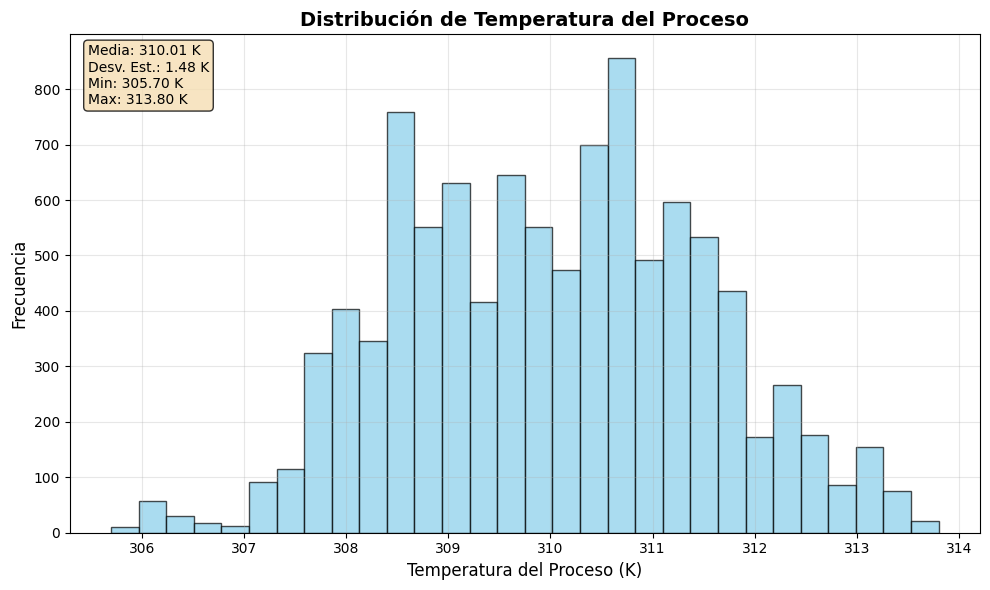


Estadísticas descriptivas de process_temperature_k:
count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: process_temperature_k, dtype: float64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de matplotlib para mejor visualización
plt.style.use('default')
sns.set_palette("husl")

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear histograma de process_temperature_k
ax.hist(df['process_temperature_k'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')

# Personalizar el gráfico
ax.set_xlabel('Temperatura del Proceso (K)', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
ax.set_title('Distribución de Temperatura del Proceso', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Agregar estadísticas descriptivas como texto
mean_temp = df['process_temperature_k'].mean()
std_temp = df['process_temperature_k'].std()
min_temp = df['process_temperature_k'].min()
max_temp = df['process_temperature_k'].max()

stats_text = f'Media: {mean_temp:.2f} K\nDesv. Est.: {std_temp:.2f} K\nMin: {min_temp:.2f} K\nMax: {max_temp:.2f} K'
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas de process_temperature_k:")
print(df['process_temperature_k'].describe()) 

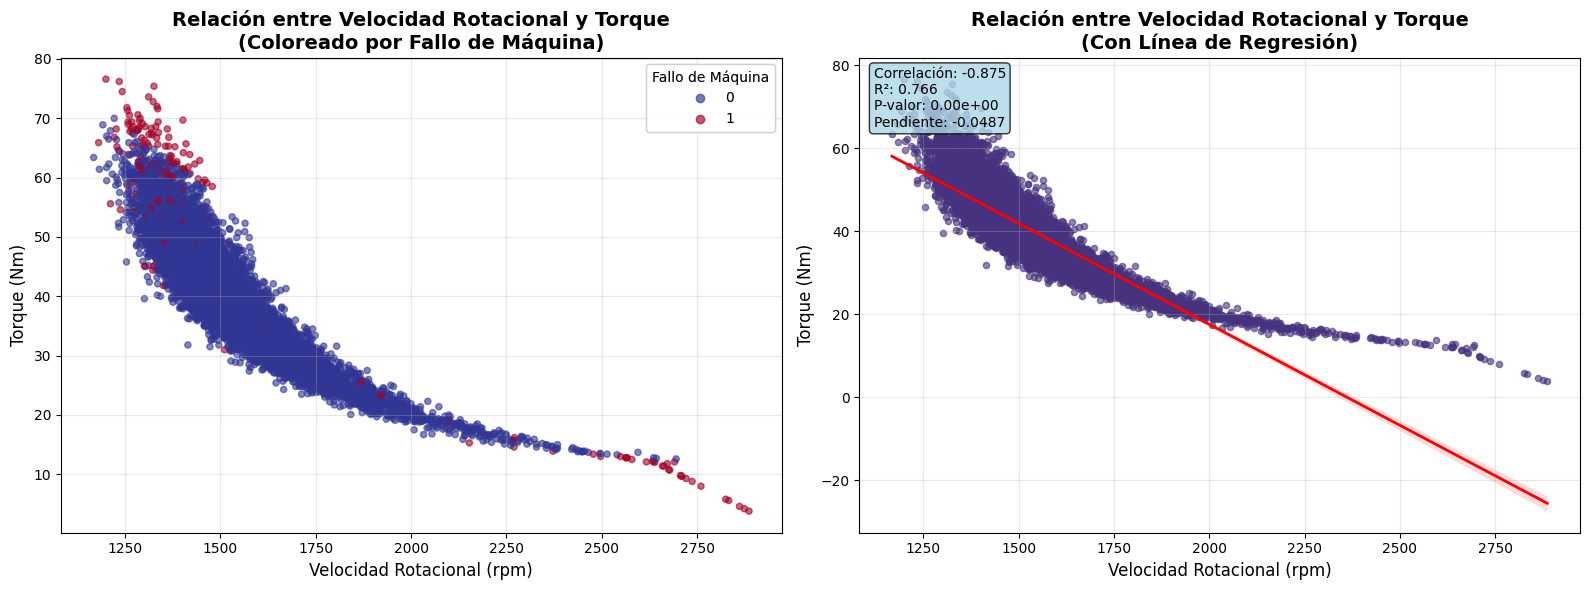

=== ANÁLISIS DE CORRELACIÓN ENTRE VELOCIDAD ROTACIONAL Y TORQUE ===

Correlación de Pearson: -0.8750
Coeficiente de determinación (R²): 0.7657
P-valor: 0.00e+00
Pendiente de la línea de regresión: -0.0487
Intercepto: 114.86

Interpretación: La correlación es muy fuerte y negativa.

=== ESTADÍSTICAS DESCRIPTIVAS ===

Velocidad Rotacional (rpm):
count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: rotational_speed_rpm, dtype: float64

Torque (Nm):
count    10000.000000
mean        39.986910
std          9.968934
min          3.800000
25%         33.200000
50%         40.100000
75%         46.800000
max         76.600000
Name: torque_nm, dtype: float64

=== ANÁLISIS POR TIPO DE PRODUCTO ===

Correlaciones por tipo de producto:
Tipo M: -0.8773
Tipo L: -0.8735
Tipo H: -0.8781


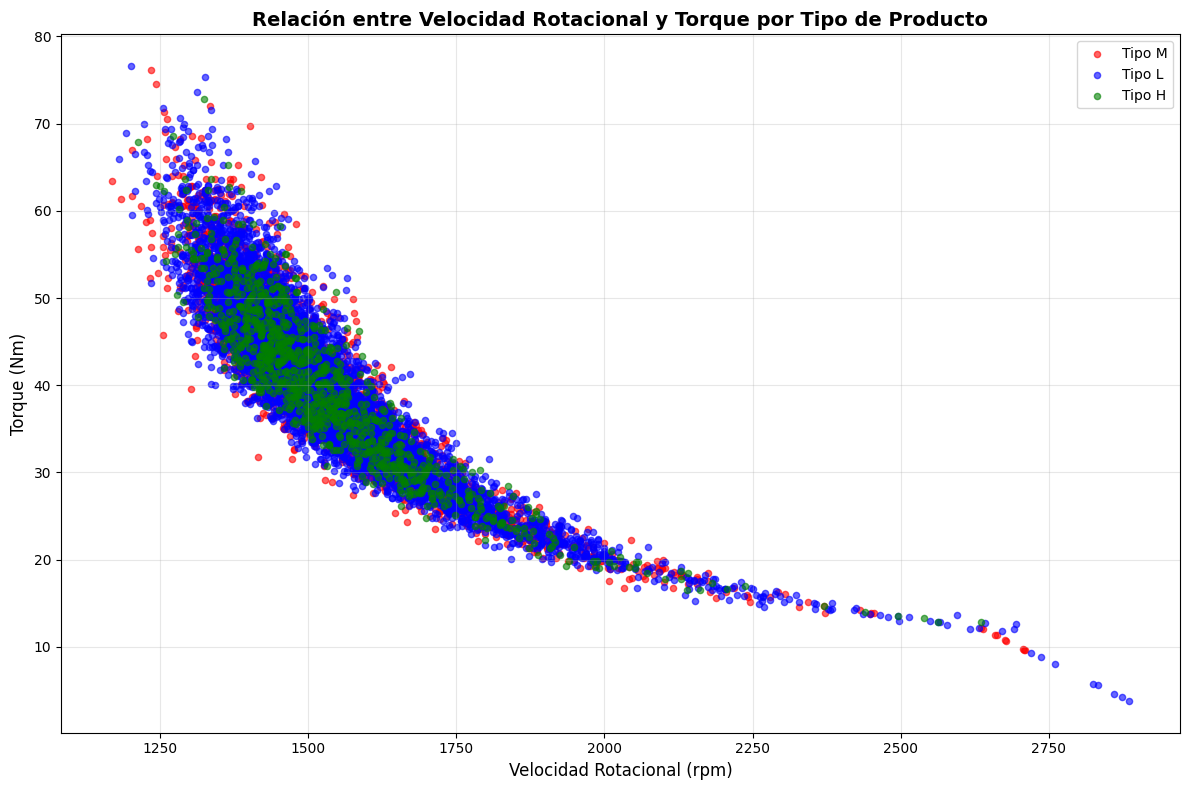

In [10]:
# DIAGRAMA DE DISPERSIÓN: Relación entre Velocidad Rotacional y Torque
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

# Configurar el estilo para mejor visualización
plt.style.use('default')
sns.set_palette("viridis")

# Crear figura y ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# === GRÁFICO 1: Scatterplot básico ===
scatter = ax1.scatter(df['rotational_speed_rpm'], df['torque_nm'], 
                     alpha=0.6, c=df['machine_failure'], 
                     cmap='RdYlBu_r', s=20)

# Personalizar el primer gráfico
ax1.set_xlabel('Velocidad Rotacional (rpm)', fontsize=12)
ax1.set_ylabel('Torque (Nm)', fontsize=12)
ax1.set_title('Relación entre Velocidad Rotacional y Torque\n(Coloreado por Fallo de Máquina)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Agregar leyenda para los colores
legend1 = ax1.legend(*scatter.legend_elements(),
                    title="Fallo de Máquina",
                    loc="upper right")
ax1.add_artist(legend1)

# === GRÁFICO 2: Scatterplot con línea de regresión ===
# Crear scatterplot con seaborn para línea de regresión
sns.regplot(data=df, x='rotational_speed_rpm', y='torque_nm', 
           ax=ax2, scatter_kws={'alpha':0.6, 's':20}, 
           line_kws={'color':'red', 'linewidth':2})

# Personalizar el segundo gráfico
ax2.set_xlabel('Velocidad Rotacional (rpm)', fontsize=12)
ax2.set_ylabel('Torque (Nm)', fontsize=12)
ax2.set_title('Relación entre Velocidad Rotacional y Torque\n(Con Línea de Regresión)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Calcular correlación y estadísticas
#correlation = df['rotational_speed_rpm'].corr(df['torque_nm'])
correlation = df['rotational_speed_rpm'].corr(df['torque_nm'], method='pearson')
slope, intercept, r_value, p_value, std_err = stats.linregress(df['rotational_speed_rpm'], df['torque_nm'])

# Agregar estadísticas como texto en el segundo gráfico
stats_text = f'Correlación: {correlation:.3f}\nR²: {r_value**2:.3f}\nP-valor: {p_value:.2e}\nPendiente: {slope:.4f}'
ax2.text(0.02, 0.98, stats_text, transform=ax2.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

# === ANÁLISIS ADICIONAL ===
print("=== ANÁLISIS DE CORRELACIÓN ENTRE VELOCIDAD ROTACIONAL Y TORQUE ===")
print(f"\nCorrelación de Pearson: {correlation:.4f}")
print(f"Coeficiente de determinación (R²): {r_value**2:.4f}")
print(f"P-valor: {p_value:.2e}")
print(f"Pendiente de la línea de regresión: {slope:.4f}")
print(f"Intercepto: {intercept:.2f}")

# Interpretación de la correlación
if abs(correlation) < 0.1:
    strength = "muy débil"
elif abs(correlation) < 0.3:
    strength = "débil"
elif abs(correlation) < 0.5:
    strength = "moderada"
elif abs(correlation) < 0.7:
    strength = "fuerte"
else:
    strength = "muy fuerte"

direction = "positiva" if correlation > 0 else "negativa"
print(f"\nInterpretación: La correlación es {strength} y {direction}.")

# Estadísticas descriptivas de ambas variables
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print("\nVelocidad Rotacional (rpm):")
print(df['rotational_speed_rpm'].describe())
print("\nTorque (Nm):")
print(df['torque_nm'].describe())

# === ANÁLISIS POR TIPO DE PRODUCTO ===
print("\n=== ANÁLISIS POR TIPO DE PRODUCTO ===")
print("\nCorrelaciones por tipo de producto:")
for product_type in df['type'].unique():
    subset = df[df['type'] == product_type]
    #corr = subset['rotational_speed_rpm'].corr(subset['torque_nm'])
    corr = subset['rotational_speed_rpm'].corr(subset['torque_nm'], method='pearson')
    print(f"Tipo {product_type}: {corr:.4f}")

# === GRÁFICO ADICIONAL: Scatterplot por tipo de producto ===
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['red', 'blue', 'green']
for i, product_type in enumerate(df['type'].unique()):
    subset = df[df['type'] == product_type]
    ax.scatter(subset['rotational_speed_rpm'], subset['torque_nm'], 
              alpha=0.6, s=20, label=f'Tipo {product_type}', color=colors[i])

ax.set_xlabel('Velocidad Rotacional (rpm)', fontsize=12)
ax.set_ylabel('Torque (Nm)', fontsize=12)
ax.set_title('Relación entre Velocidad Rotacional y Torque por Tipo de Producto', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show() 